In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [42]:
x,y = make_regression?

In [ ]:
x,y = make_regression

In [43]:
#Make sample of random points 
x,y = make_regression(n_samples=200,n_features=1,n_informative=1,noise=25.5 , random_state=1)

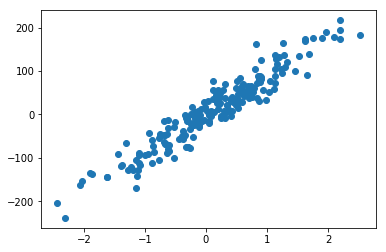

In [44]:
#Plotting these points
plt.scatter(x,y)
plt.show()

In [45]:
#Normalize the data -- if it is not normalized
# Here it was normalized, So there is no change in the data set
x=(x-x.mean())/x.std()
y=y

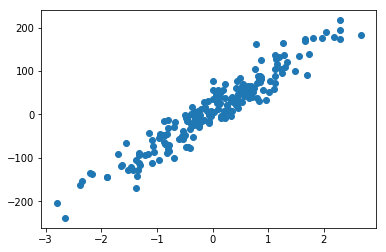

In [46]:
#Again Plotting the normalized data
plt.scatter(x,y)
plt.show()

In [73]:
# The function which return the predicted value of y, calculated from theta 0 and theta 1
def hypothesis(x,theta):
    return theta[0] + theta[1] * x 


# The function to calculate the error between the actual value and the predicted value
def error(x,y,theta):
    
    m = x.shape[0]
    err = 0
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx - y[i])**2
        
    return err

# The function to calculate the gradient
def grad(x,y,theta):
    
    m = x.shape[0]
    
    g = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        
        g[0] += (hx - y[i])
        
        g[1] += (hx - y[i]) * x[i]
        
    return g

# Actual gradient discent algorithm
def gradientDescent(x,y,learning_rate = 0.001):
    
    theta = np.zeros((2,))
    
    itr = 0 
    max_itr = 100
    
    error_list= []
    while(itr <= max_itr):
        g = grad(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate * g[0]
        theta[1] = theta[1] - learning_rate * g[1]
        itr += 1
        
    return theta,error_list

        
        
    

In [74]:
# The returned values from the error function
# final_theta contains the final values of theta 0 and theta 1 and the error_list contains the error at 
#each iteration between actual and the predicted value

final_theta,error_list = gradientDescent(x,y)

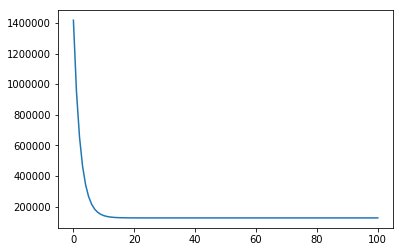

In [75]:
#Ploting the final error 
plt.plot(error_list)
plt.show()

In [76]:
# Final Values of theta
print(final_theta)

[ 8.83114993 79.86386448]


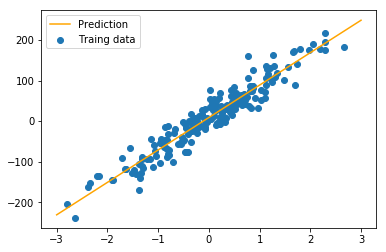

In [77]:
# Taking 10 test point and plotting the line of equation using these point and the values of theta 0 and theta 1

#Here linspace() function will return 10 equally spaced points between -3 and 3
x_test = np.linspace(-3,3 ,10)
y_test = []

# Calculation the values of corresponding y's by using x values.
for x_ in x_test:
    y_test.append(hypothesis(x_,final_theta))

# Converting the y_test array into numpy array
y_test = np.array(y_test)

# Plotting our traning data and predicted line in the same figure. This orange line is our final result.
plt.scatter(x,y,label = "Traing data")
plt.plot(x_test,y_test,color='orange',label="Prediction")
plt.legend()
plt.show()